# Predicting Customer Churn Using RandomForest

RandomForest모델을 사용하여 신규 고객의 여러가지 특성을 통해 고객의 이탈(Churn)에 대해서 예측하는 프로젝트이다.

### Exploring Dataset

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

telco = pd.read_csv('Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [8]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [120]:
print(telco.groupby(['Churn']).mean())

       Account_Length  Vmail_Message     ...      Intl_Charge   Area_Code
Churn                                    ...                             
no         100.793684       8.604561     ...         2.743404  437.074737
yes        102.664596       5.115942     ...         2.889545  437.817805

[2 rows x 16 columns]


In [121]:
print(telco.groupby(['Churn']).std())

       Account_Length  Vmail_Message    ...      Intl_Charge  Area_Code
Churn                                   ...                            
no           39.88235      13.913125    ...         0.751784  42.306156
yes          39.46782      11.860138    ...         0.754152  42.792270

[2 rows x 16 columns]


In [122]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

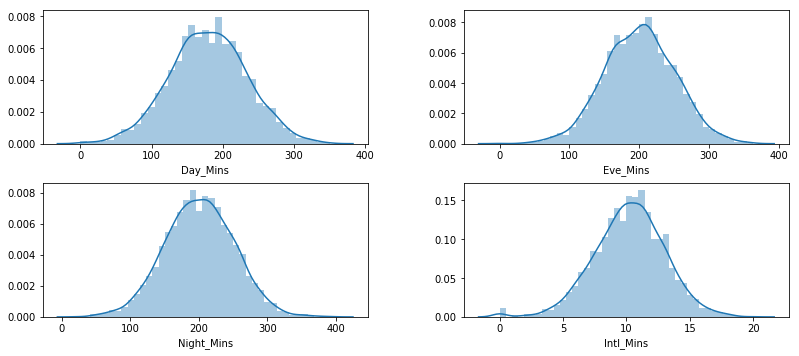

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() 
fig.set_size_inches([12,5])

sns.distplot(telco['Day_Mins'], ax=ax1)
sns.distplot(telco['Eve_Mins'], ax=ax2)
sns.distplot(telco['Night_Mins'], ax=ax3)
sns.distplot(telco['Intl_Mins'], ax=ax4)

plt.show()

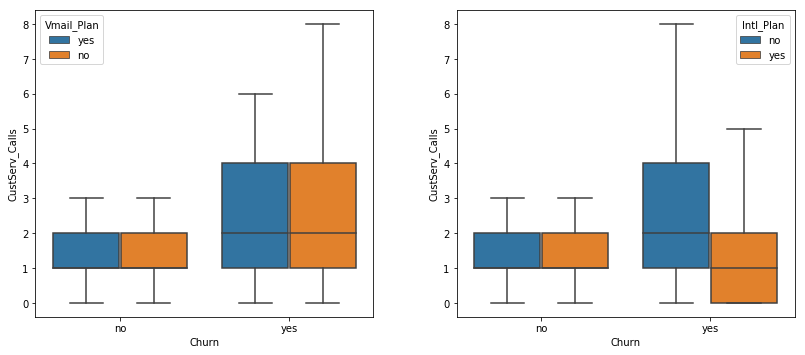

In [124]:

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
plt.tight_layout() 
fig.set_size_inches([12,5])

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan",
            ax=ax1)

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan",
            ax=ax2)


plt.show()

### Data Preprocessing

In [125]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

### Encoding binary features

In [9]:

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no': 0 , 'yes': 1})

print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())
print(telco['Intl_Plan'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


### Feature Scaling

In [127]:
# Scale telco
from sklearn.preprocessing import StandardScaler

telco_without_categorical = telco.select_dtypes(exclude=['object'])

telco_scaled = StandardScaler().fit_transform(telco_without_categorical)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_without_categorical, columns=["Intl_Calls", "Night_Mins"])


print(telco_scaled_df.describe())

        Intl_Calls   Night_Mins
count  3333.000000  3333.000000
mean      4.479448   200.872037
std       2.461214    50.573847
min       0.000000    23.200000
25%       3.000000   167.000000
50%       4.000000   201.200000
75%       6.000000   235.300000
max      20.000000   395.000000


In [128]:
# Drop the unnecessary features

telco = telco.drop(telco[['Area_Code', 'State','Phone']], axis=1)

print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')


### Create New Features

In [129]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']


print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


### Creating traing and test sets

In [130]:

from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Computing Accuracy

In [131]:

from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.9235382308845578


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Confusion martrix

In [132]:

from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[553  12]
 [ 39  63]]


### Computing Precision and Recall

In [133]:

from sklearn.metrics import precision_score


print(precision_score(y_test, y_pred))

0.84


In [134]:
from sklearn.metrics import recall_score


print(recall_score(y_test, y_pred))

0.6176470588235294


### F1 Score

In [135]:

from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.711864406779661


### ROC curve

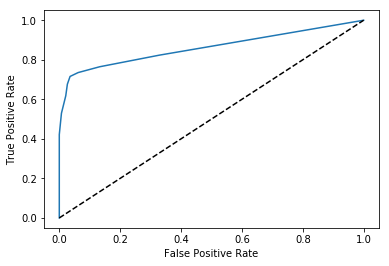

In [136]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]


from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.plot(fpr, tpr)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [137]:

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_prob))

0.8610619469026549


### Tuning the number of features

In [138]:

from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)


print(grid_search.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 'log2'}


In [139]:

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

print(grid_search.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


### Visualizing Feature Importance

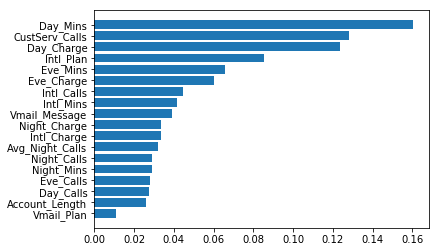

In [142]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()